In [1]:
# #5/19 테스트
# from google.colab import drive
# drive.mount('/content/drive')
# import os
# os.chdir('/content/drive/MyDrive/Colab Notebooks/swishnet')
# import sys
# sys.path.append(os.getcwd())
# !pip install import-ipynb


In [2]:

import torch
from torch.utils.data import DataLoader
import import_ipynb
from dataset import train_data,eval_data
from model import swishnet

torch.Size([16, 20, 99]) 1
torch.Size([16, 16, 99]) 2
torch.Size([16, 32, 99]) 3
torch.Size([16, 16, 99]) 4
torch.Size([16, 16, 99]) 5
torch.Size([16, 16, 99]) 6
torch.Size([16, 16, 99]) 7
torch.Size([16, 16, 99]) 8
torch.Size([16, 16, 99]) 9
torch.Size([16, 80, 99]) 10
torch.Size([16, 4, 99]) 11
torch.Size([16, 4]) 12
torch.Size([16, 4]) 13


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [4]:
learning_rate = 1e-3
batch_size = 64
epochs = 100

In [5]:
model = swishnet(sample_rate=16000).to(device)
training_data = train_data()
evel_data = eval_data()
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(evel_data, batch_size=batch_size, shuffle=True)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [6]:
def one_epoch_loop(train_dataloader, test_dataloader, model, loss_fn, optimizer, device):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for batch_idx, (X, y) in enumerate(train_dataloader):
        X = X.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        pred = model(X)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = pred.argmax(dim=1)
        train_correct += (preds == y).sum().item()
        train_total += y.size(0)

        if batch_idx % 100 == 0:
            print(f"[Batch {batch_idx}] Train Loss: {loss.item():.6f}")

    train_acc = train_correct / train_total
    train_loss /= train_total #에포크당 평균 loss
    
    model.eval()
    test_loss = 0.0
    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for X, y in test_dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)

            test_loss += loss.item()
            preds = pred.argmax(dim=1)
            test_correct += (preds == y).sum().item()
            test_total += y.size(0)

    test_loss /= test_total
    test_acc = test_correct / test_total

    return train_loss, test_loss, test_acc, train_acc


In [7]:
train_loss_list = []
test_loss_list = []
test_acc_list = []
train_acc_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss, test_loss, test_acc, train_acc = one_epoch_loop(train_dataloader,test_dataloader, model, loss_fn, optimizer,device)
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    break

Epoch 1
-------------------------------
torch.Size([64, 20, 99]) 1
torch.Size([64, 16, 99]) 2
torch.Size([64, 32, 99]) 3
torch.Size([64, 16, 99]) 4
torch.Size([64, 16, 99]) 5
torch.Size([64, 16, 99]) 6
torch.Size([64, 16, 99]) 7
torch.Size([64, 16, 99]) 8
torch.Size([64, 16, 99]) 9
torch.Size([64, 80, 99]) 10
torch.Size([64, 4, 99]) 11
torch.Size([64, 4]) 12
torch.Size([64, 4]) 13
[Batch 0] Train Loss: 1.388325
torch.Size([64, 20, 99]) 1
torch.Size([64, 16, 99]) 2
torch.Size([64, 32, 99]) 3
torch.Size([64, 16, 99]) 4
torch.Size([64, 16, 99]) 5
torch.Size([64, 16, 99]) 6
torch.Size([64, 16, 99]) 7
torch.Size([64, 16, 99]) 8
torch.Size([64, 16, 99]) 9
torch.Size([64, 80, 99]) 10
torch.Size([64, 4, 99]) 11
torch.Size([64, 4]) 12
torch.Size([64, 4]) 13
torch.Size([64, 20, 99]) 1
torch.Size([64, 16, 99]) 2
torch.Size([64, 32, 99]) 3
torch.Size([64, 16, 99]) 4
torch.Size([64, 16, 99]) 5
torch.Size([64, 16, 99]) 6
torch.Size([64, 16, 99]) 7
torch.Size([64, 16, 99]) 8
torch.Size([64, 16, 99]) 

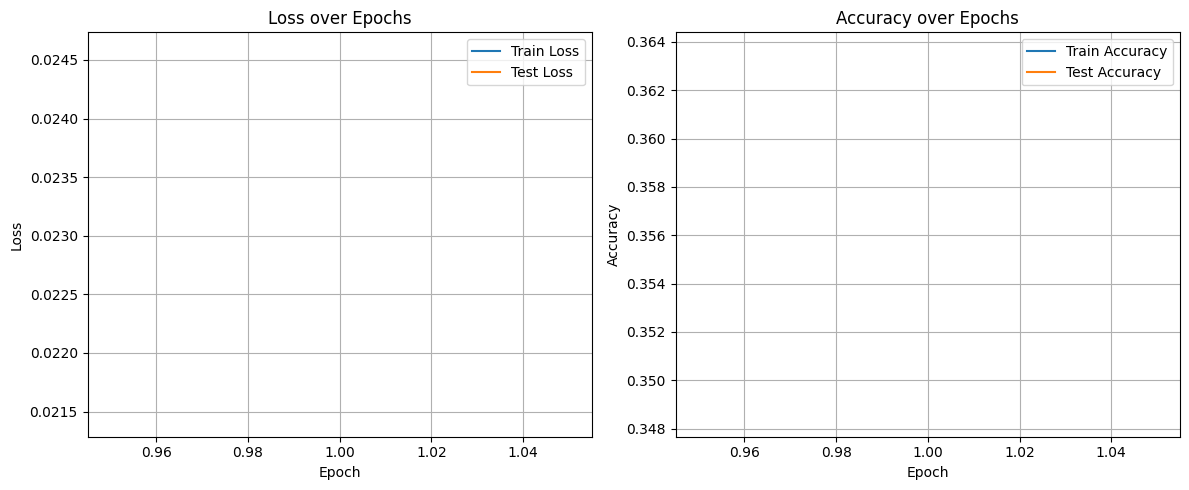

In [9]:
import matplotlib.pyplot as plt

epochs_range = range(1, len(train_loss_list) + 1)

plt.figure(figsize=(12, 5))

# 🔹 Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss_list, label='Train Loss')
plt.plot(epochs_range, test_loss_list, label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 🔹 Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc_list, label='Train Accuracy')
plt.plot(epochs_range, test_acc_list, label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


파일을 입력 받아서 하나의 리스트로 내놓게
파일을 하나 받나? 하나 받아서 일정 구간으로 나눠서?
